In [2]:
# Importing the libraries

import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# Define the folder path
#folder_path = "C:/Users/maert/Desktop/logs/DL/"
#folder_path = "/Users/mikkelgrongard/Library/Mobile Documents/com~apple~CloudDocs/bachelor_local/Cifar10/Run2"
folder_path = "D:\Bachelor_2\Cifar10\Run1"
# List to hold dataframes
dfs = []

# Iterate through the folder and read each CSV file
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        print(f"Reading file: {filename}")
        file_path = os.path.join(folder_path, filename)
        dfs.append(pd.read_csv(file_path))

# Concatenate all dataframes
df = pd.concat(dfs, ignore_index=True)

print(df.head())

Reading file: training_log_cifar_1.csv
Reading file: training_log_cifar_2.csv
Reading file: training_log_cifar_3.csv
Reading file: training_log_cifar_4.csv
   Model Size  Dataset Fraction  Epoch  Train Loss  Train Accuracy  \
0           1          0.333333      1    2.329945       11.478459   
1           1          0.333333      2    2.298063       12.108484   
2           1          0.333333      3    2.271240       13.206528   
3           1          0.333333      4    2.244513       14.916597   
4           1          0.333333      5    2.221636       15.960638   

   Test Accuracy  Test Loss  Train MSE Loss  Test MSE Loss  
0          12.14   2.304443        0.090534       0.090090  
1          13.68   2.268759        0.089949       0.089379  
2          14.40   2.233907        0.089389       0.088631  
3          16.60   2.197060        0.088805       0.087819  
4          17.68   2.167611        0.088298       0.087175  


In [58]:
# List to hold dataframes
folder_path1 = "/Users/mikkelgrongard/Library/Mobile Documents/com~apple~CloudDocs/bachelor_local/Cifar10/Run1"

dfs1 = []

for filename1 in os.listdir(folder_path1):
    if filename1.endswith('.csv'):
        print(f"Reading file: {filename1}")
        file_path1 = os.path.join(folder_path1, filename1)
        dfs1.append(pd.read_csv(file_path1))

# Concatenate all dataframes
df1 = pd.concat(dfs1, ignore_index=True)

print(df1.head())

Reading file: training_log_cifar_4.csv
Reading file: training_log_cifar_2.csv
Reading file: training_log_cifar_3.csv
Reading file: training_log_cifar_1.csv
   Model Size  Dataset Fraction  Epoch  Train Loss  Train Accuracy  \
0          54          0.333333      1    1.899142       33.265331   
1          54          0.333333      2    1.577683       48.181927   
2          54          0.333333      3    1.317332       58.154326   
3          54          0.333333      4    0.924338       70.922837   
4          54          0.333333      5    0.486738       84.759390   

   Test Accuracy  Test Loss  Train MSE Loss  Test MSE Loss  
0          44.06   1.574595        0.078971       0.069855  
1          50.94   1.393048        0.067377       0.062989  
2          51.14   1.404102        0.056816       0.063172  
3          48.12   1.606427        0.041037       0.070045  
4          40.17   3.019935        0.022620       0.091181  


In [59]:
#calculate the difference between the two runs
df['accuracy_diff'] = df['Train Accuracy'] - df1['Train Accuracy']
df['loss_diff'] = df['Train Loss'] - df1['Train Loss']
df['val_accuracy_diff'] = df['Test Accuracy'] - df1['Test Accuracy']
df['val_loss_diff'] = df['Test Loss'] - df1['Test Loss']

#Sum the difference
print(df['accuracy_diff'].sum())
print(df['loss_diff'].sum())
print(df['val_accuracy_diff'].sum())
print(df['val_loss_diff'].sum())

-4022.009452011855
115.3430590724253
-132239.48000000016
18804.91460977077


In [60]:
# Create a new column with error for both train and test which is 1 - accuracy
df['Train Error'] = 1 - df['Train Accuracy']/100
df['Test Error'] = 1 - df['Test Accuracy']/100

In [61]:
# Create a new column with error for both train and test which is 1 - accuracy
df1['Train Error'] = 1 - df1['Train Accuracy']/100
df1['Test Error'] = 1 - df1['Test Accuracy']/100

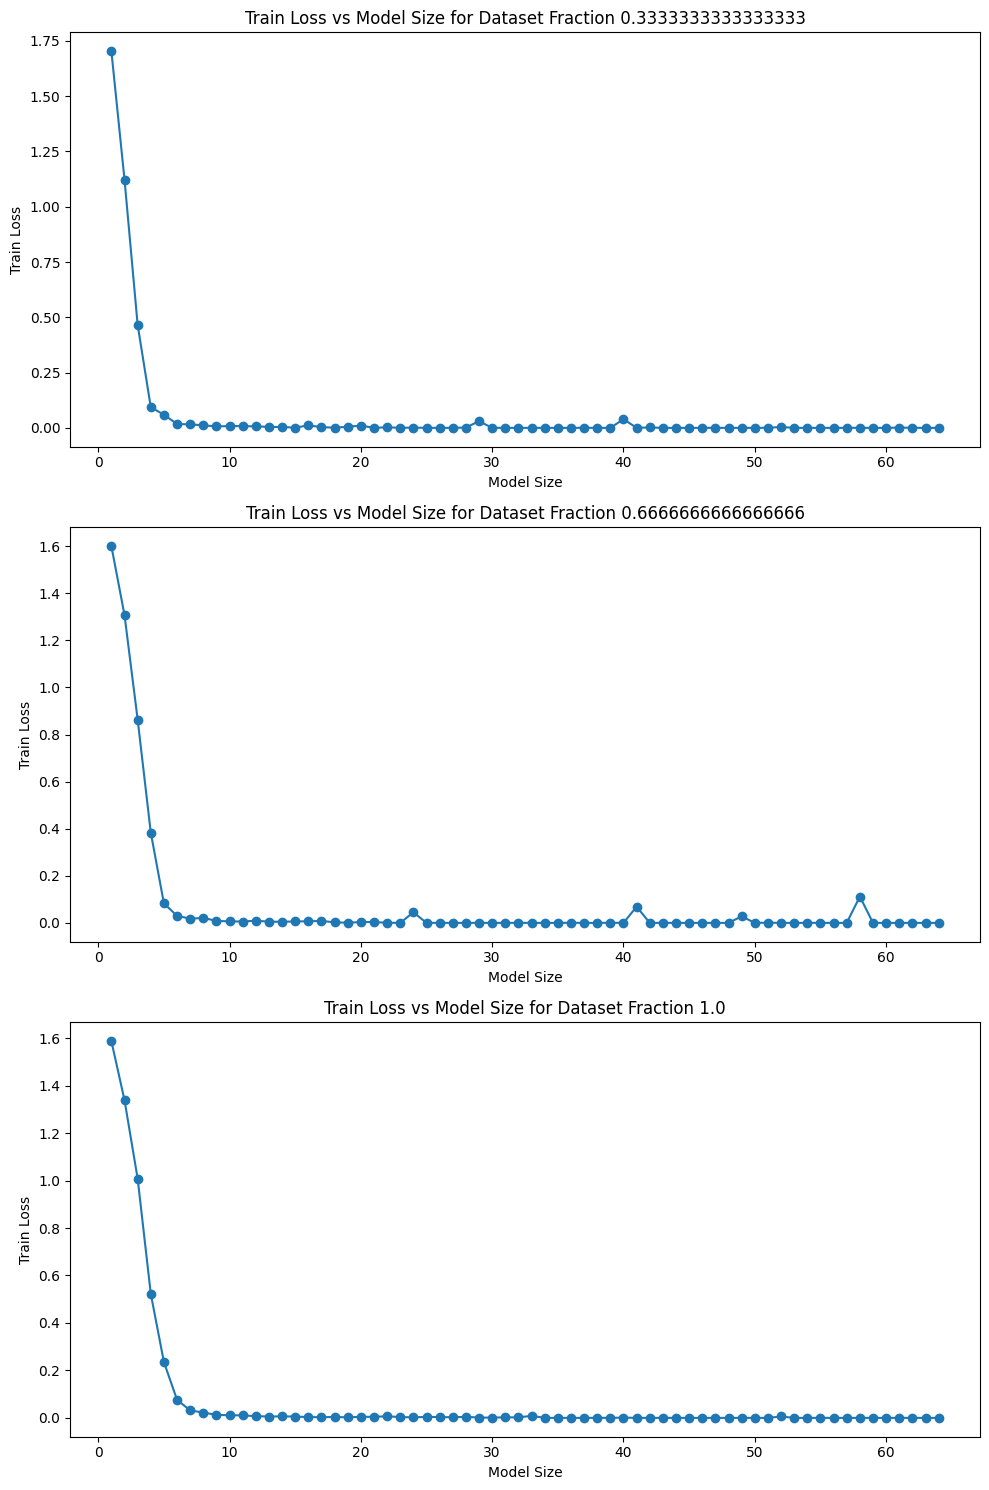

In [62]:
# Convert 'Model Size' column to integers
df['Model Size'] = df['Model Size'].astype(int)

# Filter the dataframe to get the last epoch for each data fraction and model size
last_epoch_df = df.loc[df.groupby(['Model Size', 'Dataset Fraction'])['Epoch'].idxmax()]
#print(last_epoch_df)

# get unique dataset fractions
dataset_fractions = last_epoch_df['Dataset Fraction'].unique()

# create 3 dataframe for each dataset fraction
df_1 = last_epoch_df[last_epoch_df['Dataset Fraction'] == dataset_fractions[0]].copy()
df_2 = last_epoch_df[last_epoch_df['Dataset Fraction'] == dataset_fractions[1]].copy()
df_3 = last_epoch_df[last_epoch_df['Dataset Fraction'] == dataset_fractions[2]].copy()

# Plot individual plots for each dataframe
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Plot for df_1
axes[0].plot(df_1['Model Size'], df_1['Train Loss'], marker='o')
axes[0].set_title(f'Train Loss vs Model Size for Dataset Fraction {dataset_fractions[0]}')
axes[0].set_xlabel('Model Size')
axes[0].set_ylabel('Train Loss')

# Plot for df_2
axes[1].plot(df_2['Model Size'], df_2['Train Loss'], marker='o')
axes[1].set_title(f'Train Loss vs Model Size for Dataset Fraction {dataset_fractions[1]}')
axes[1].set_xlabel('Model Size')
axes[1].set_ylabel('Train Loss')

# Plot for df_3
axes[2].plot(df_3['Model Size'], df_3['Train Loss'], marker='o')
axes[2].set_title(f'Train Loss vs Model Size for Dataset Fraction {dataset_fractions[2]}')
axes[2].set_xlabel('Model Size')
axes[2].set_ylabel('Train Loss')

plt.tight_layout()
plt.show()



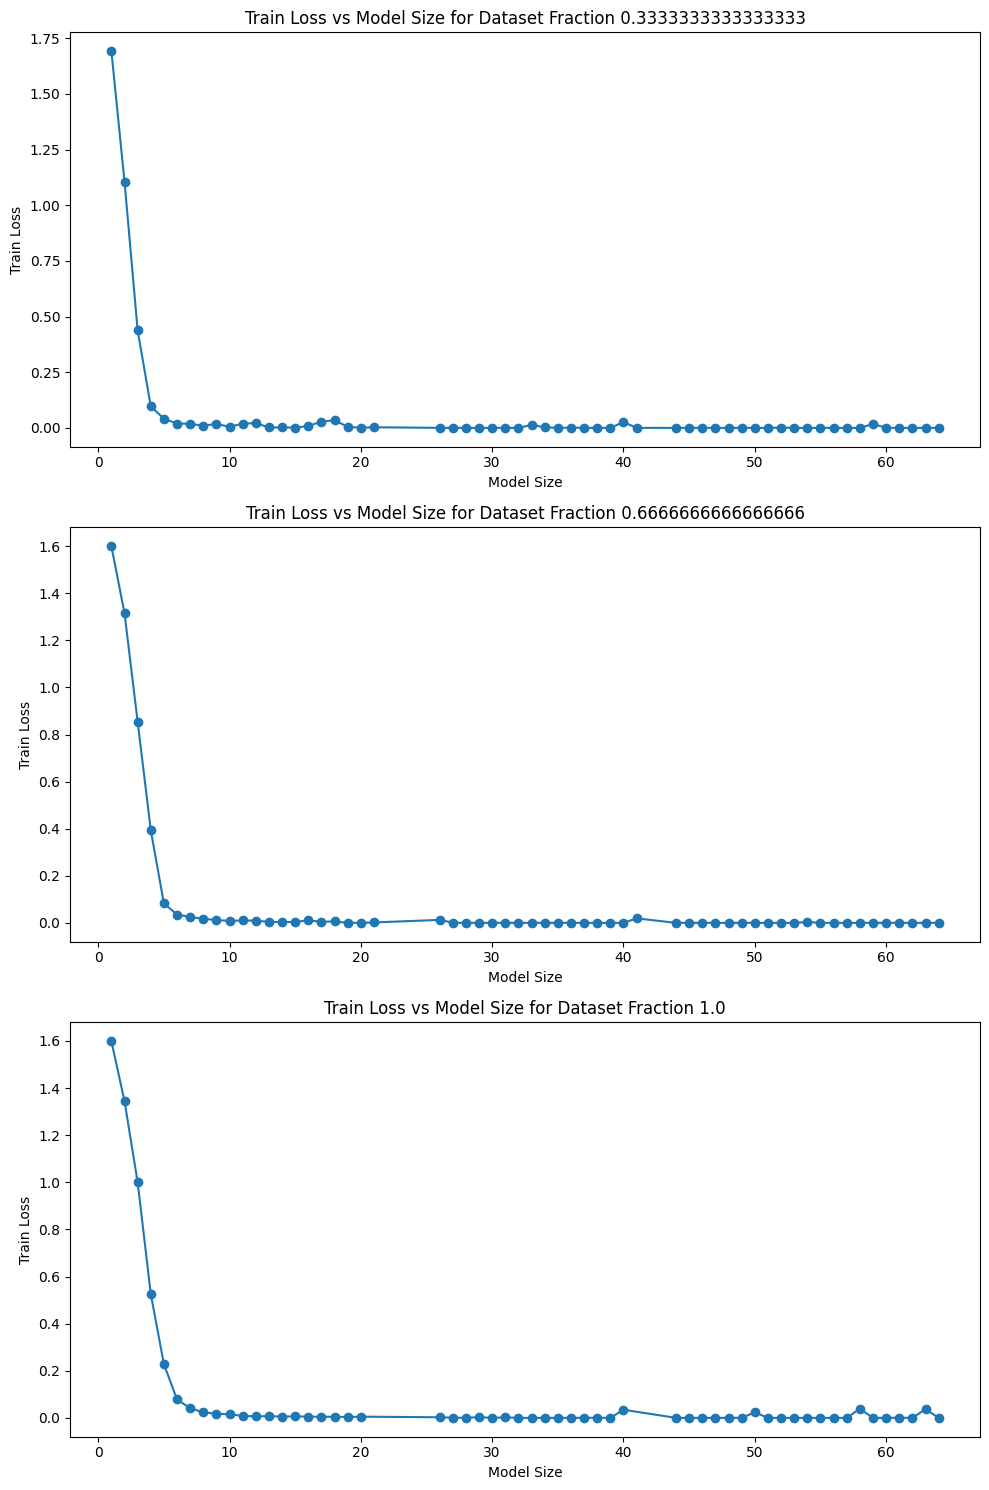

In [63]:
# Convert 'Model Size' column to integers
df1['Model Size'] = df1['Model Size'].astype(int)

# Filter the dataframe to get the last epoch for each data fraction and model size
last_epoch_df1 = df1.loc[df1.groupby(['Model Size', 'Dataset Fraction'])['Epoch'].idxmax()]

# get unique dataset fractions
dataset_fractions1 = last_epoch_df1['Dataset Fraction'].unique()

# create 3 dataframe for each dataset fraction
df1_1 = last_epoch_df1[last_epoch_df1['Dataset Fraction'] == dataset_fractions1[0]].copy()
df1_2 = last_epoch_df1[last_epoch_df1['Dataset Fraction'] == dataset_fractions1[1]].copy()
df1_3 = last_epoch_df1[last_epoch_df1['Dataset Fraction'] == dataset_fractions1[2]].copy()

# Plot individual plots for each dataframe
fig1, axes1 = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Plot for df_1
axes1[0].plot(df1_1['Model Size'], df1_1['Train Loss'], marker='o')
axes1[0].set_title(f'Train Loss vs Model Size for Dataset Fraction {dataset_fractions1[0]}')
axes1[0].set_xlabel('Model Size')
axes1[0].set_ylabel('Train Loss')

# Plot for df_2
axes1[1].plot(df1_2['Model Size'], df1_2['Train Loss'], marker='o')
axes1[1].set_title(f'Train Loss vs Model Size for Dataset Fraction {dataset_fractions1[1]}')
axes1[1].set_xlabel('Model Size')
axes1[1].set_ylabel('Train Loss')

# Plot for df_3
axes1[2].plot(df1_3['Model Size'], df1_3['Train Loss'], marker='o')
axes1[2].set_title(f'Train Loss vs Model Size for Dataset Fraction {dataset_fractions1[2]}')
axes1[2].set_xlabel('Model Size')
axes1[2].set_ylabel('Train Loss')

plt.tight_layout()
plt.show()

In [64]:
# Convert 'Model Size' column to integers
df['Model Size'] = df['Model Size'].astype(int)

# Filter the dataframe to get the last epoch for each data fraction and model size
last_epoch_df = df.loc[df.groupby(['Model Size', 'Dataset Fraction'])['Epoch'].idxmax()]


In [65]:
# Convert 'Model Size' column to integers
df1['Model Size'] = df1['Model Size'].astype(int)

# Filter the dataframe to get the last epoch for each data fraction and model size
last_epoch_df1 = df1.loc[df1.groupby(['Model Size', 'Dataset Fraction'])['Epoch'].idxmax()]


In [66]:
#Make a new dataframe that ´holds the mean over the two other dataframes
df_mean = last_epoch_df.copy()
df_mean['Train Loss'] = (last_epoch_df['Train Loss'] + last_epoch_df1['Train Loss'])/2
df_mean['Train Accuracy'] = (last_epoch_df['Train Accuracy'] + last_epoch_df1['Train Accuracy'])/2
df_mean['Test Loss'] = (last_epoch_df['Test Loss'] + last_epoch_df1['Test Loss'])/2
df_mean['Test Accuracy'] = (last_epoch_df['Test Accuracy'] + last_epoch_df1['Test Accuracy'])/2
df_mean['Train Error'] = 1 - df_mean['Train Accuracy']/100
df_mean['Test Error'] = 1 - df_mean['Test Accuracy']/100
#Also add the model size and dataset fraction
df_mean['Model Size'] = last_epoch_df['Model Size']
df_mean['Dataset Fraction'] = last_epoch_df['Dataset Fraction']



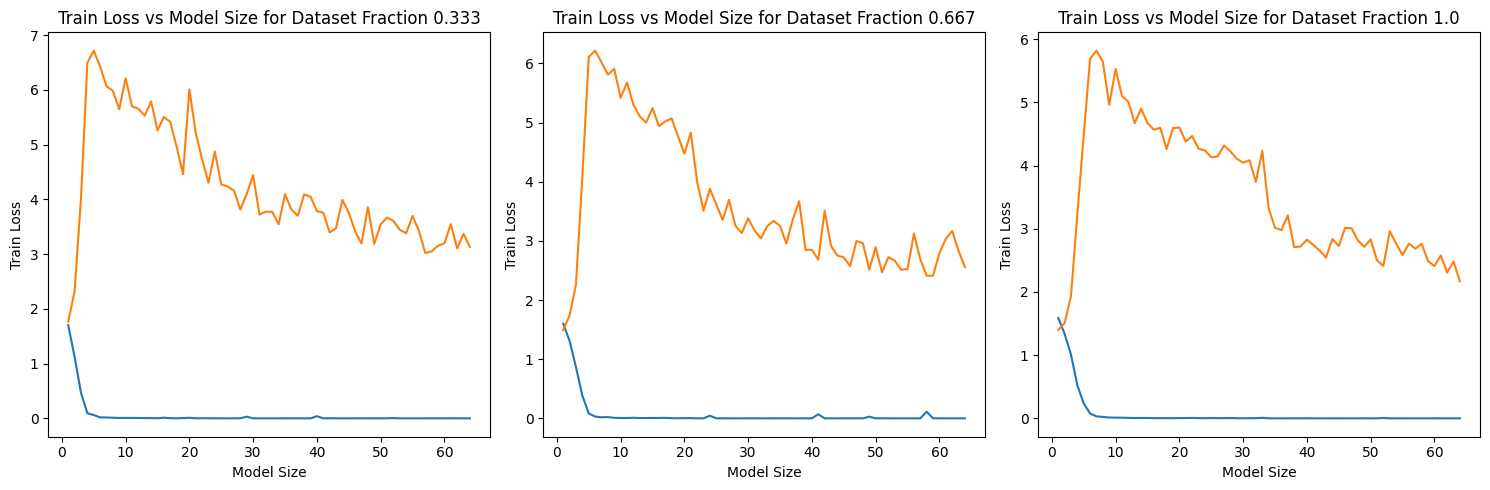

In [67]:
# plot individual plots for each dataset fraction with model size on x-axis and train loss on y-axis
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, dataset_fraction in enumerate(dataset_fractions):
    df_temp = last_epoch_df[last_epoch_df['Dataset Fraction'] == dataset_fraction]
    axes[i].plot(df_temp['Model Size'], df_temp['Train Loss'])
    axes[i].plot(df_temp['Model Size'], df_temp['Test Loss'])
    axes[i].set_title(f'Train Loss vs Model Size for Dataset Fraction {round(dataset_fraction,3)}')
    axes[i].set_xlabel('Model Size')
    axes[i].set_ylabel('Train Loss')
    
plt.tight_layout()
plt.show()

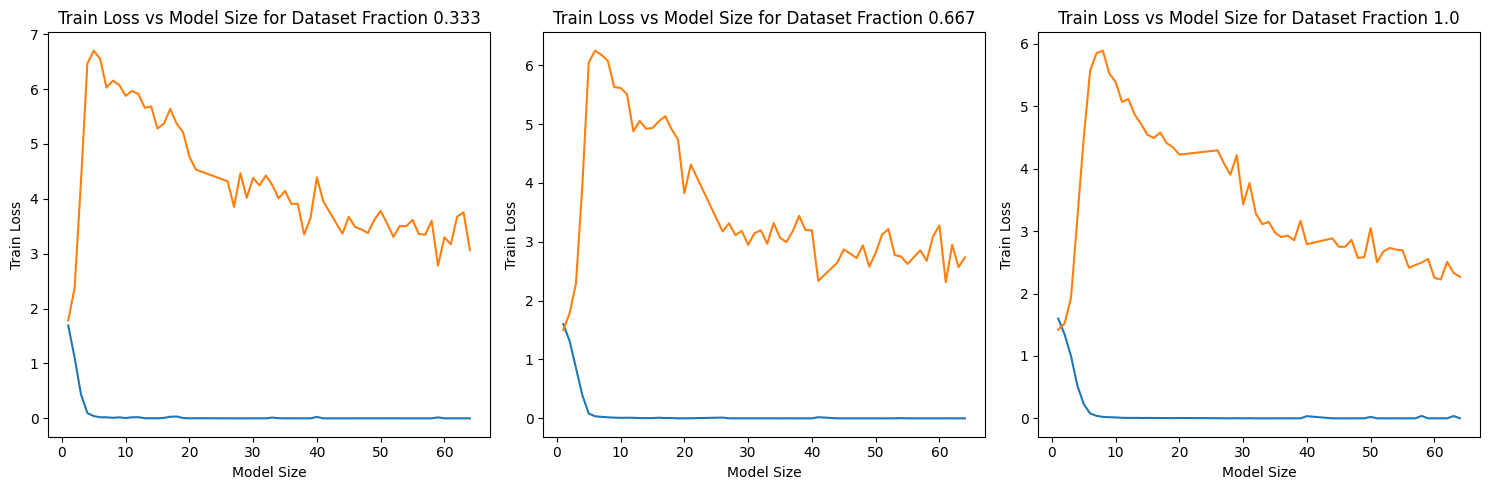

In [68]:
# plot individual plots for each dataset fraction with model size on x-axis and train loss on y-axis
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, dataset_fraction1 in enumerate(dataset_fractions1):
    df_temp1 = last_epoch_df1[last_epoch_df1['Dataset Fraction'] == dataset_fraction1]
    axes[i].plot(df_temp1['Model Size'], df_temp1['Train Loss'])
    axes[i].plot(df_temp1['Model Size'], df_temp1['Test Loss'])
    axes[i].set_title(f'Train Loss vs Model Size for Dataset Fraction {round(dataset_fraction1,3)}')
    axes[i].set_xlabel('Model Size')
    axes[i].set_ylabel('Train Loss')
    
plt.tight_layout()
plt.show()

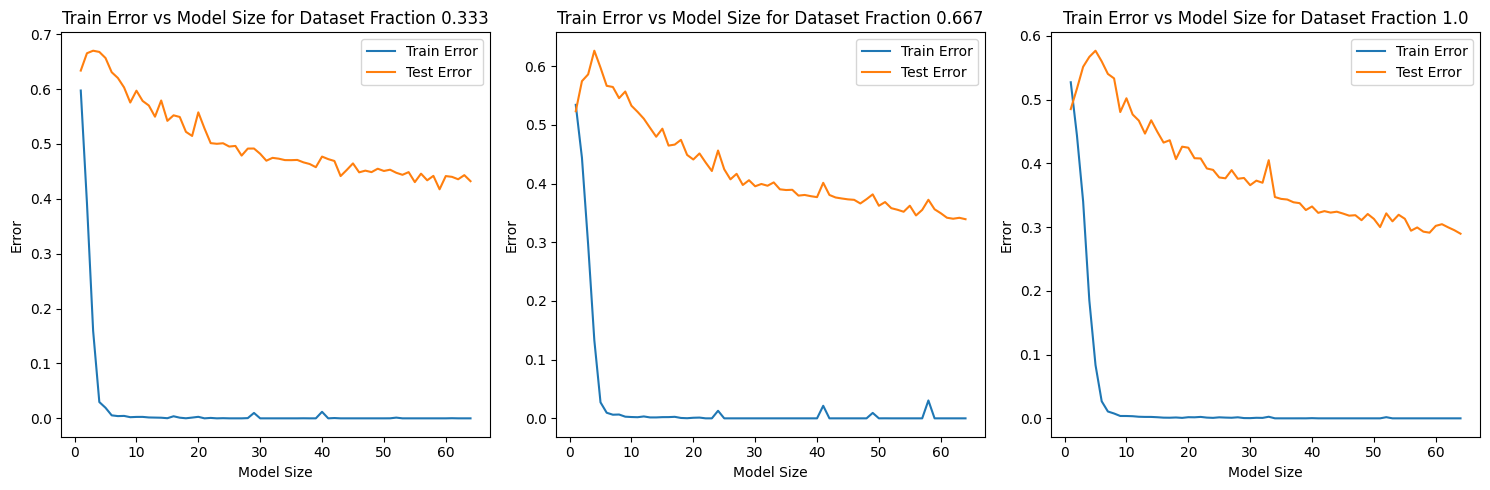

In [69]:
# plot individual plots for each dataset fraction with model size on x-axis and train error and test error on y-axis
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, dataset_fraction in enumerate(dataset_fractions):
    df_temp = last_epoch_df[last_epoch_df['Dataset Fraction'] == dataset_fraction]
    axes[i].plot(df_temp['Model Size'], df_temp['Train Error'], label='Train Error')
    axes[i].plot(df_temp['Model Size'], df_temp['Test Error'], label='Test Error')
    axes[i].set_title(f'Train Error vs Model Size for Dataset Fraction {round(dataset_fraction, 3)}')
    axes[i].set_xlabel('Model Size')
    axes[i].set_ylabel('Error')
    axes[i].legend()
    
plt.tight_layout()
plt.show()

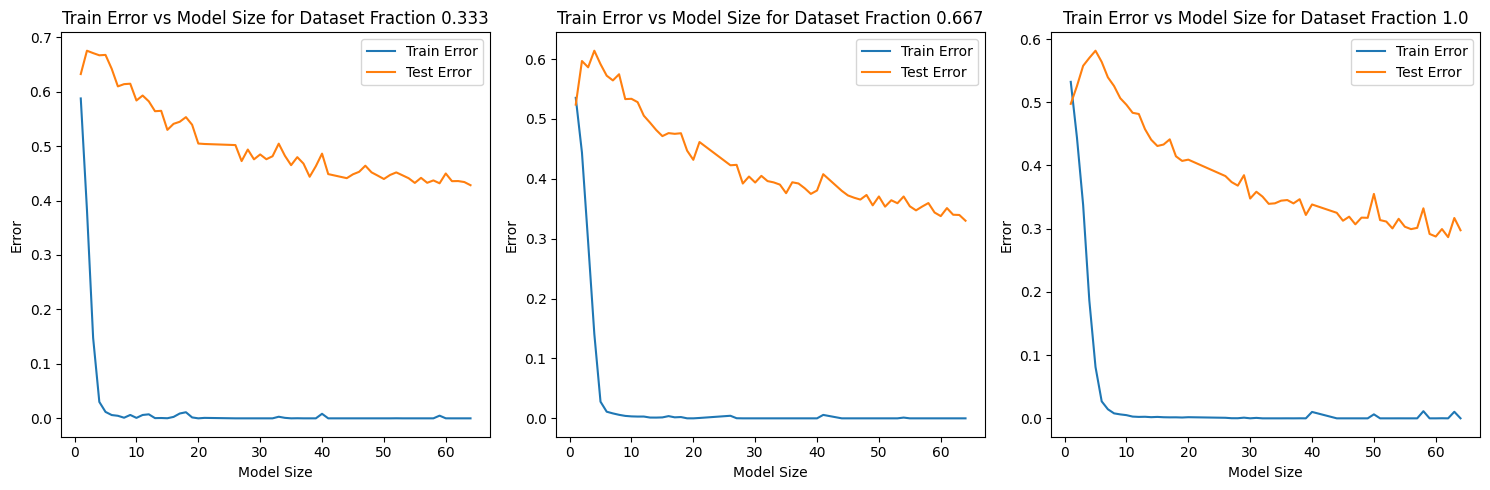

In [70]:
# plot individual plots for each dataset fraction with model size on x-axis and train error and test error on y-axis
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, dataset_fraction1 in enumerate(dataset_fractions1):
    df_temp1 = last_epoch_df1[last_epoch_df1['Dataset Fraction'] == dataset_fraction1]
    axes[i].plot(df_temp1['Model Size'], df_temp1['Train Error'], label='Train Error')
    axes[i].plot(df_temp1['Model Size'], df_temp1['Test Error'], label='Test Error')
    axes[i].set_title(f'Train Error vs Model Size for Dataset Fraction {round(dataset_fraction1, 3)}')
    axes[i].set_xlabel('Model Size')
    axes[i].set_ylabel('Error')
    axes[i].legend()
    
plt.tight_layout()
plt.show()

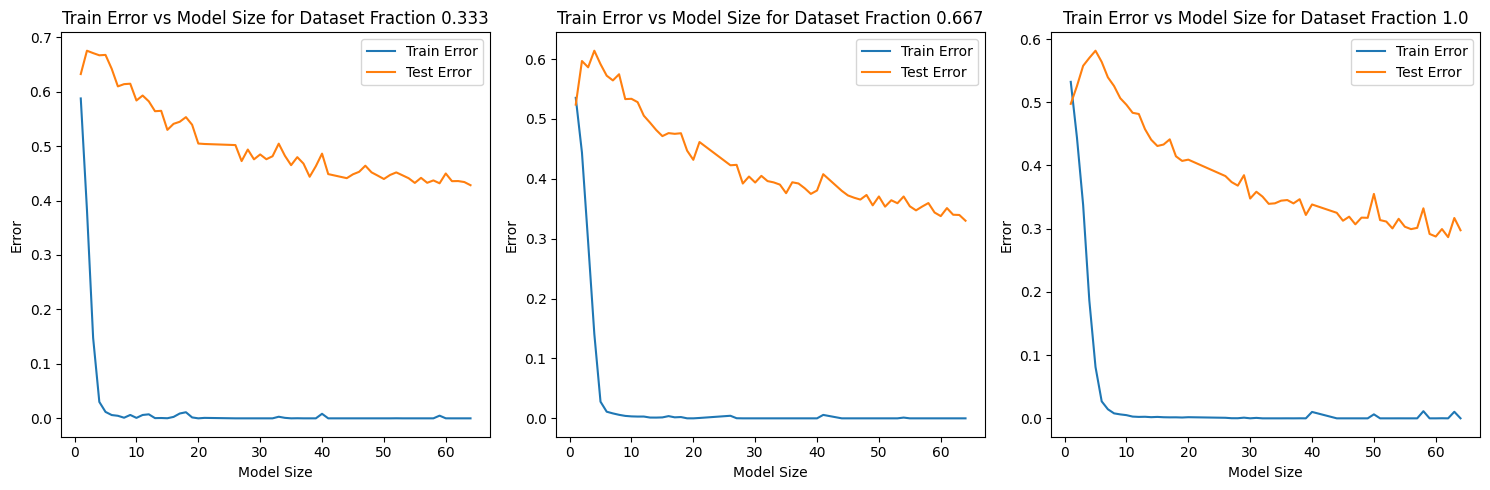

In [71]:
# plot individual plots for each dataset fraction with model size on x-axis and train error and test error on y-axis
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, dataset_fraction1 in enumerate(dataset_fractions1):
    df_temp1 = last_epoch_df1[last_epoch_df1['Dataset Fraction'] == dataset_fraction1]
    axes[i].plot(df_temp1['Model Size'], df_temp1['Train Error'], label='Train Error')
    axes[i].plot(df_temp1['Model Size'], df_temp1['Test Error'], label='Test Error')
    axes[i].set_title(f'Train Error vs Model Size for Dataset Fraction {round(dataset_fraction1, 3)}')
    axes[i].set_xlabel('Model Size')
    axes[i].set_ylabel('Error')
    axes[i].legend()
    
plt.tight_layout()
plt.show()

Means:

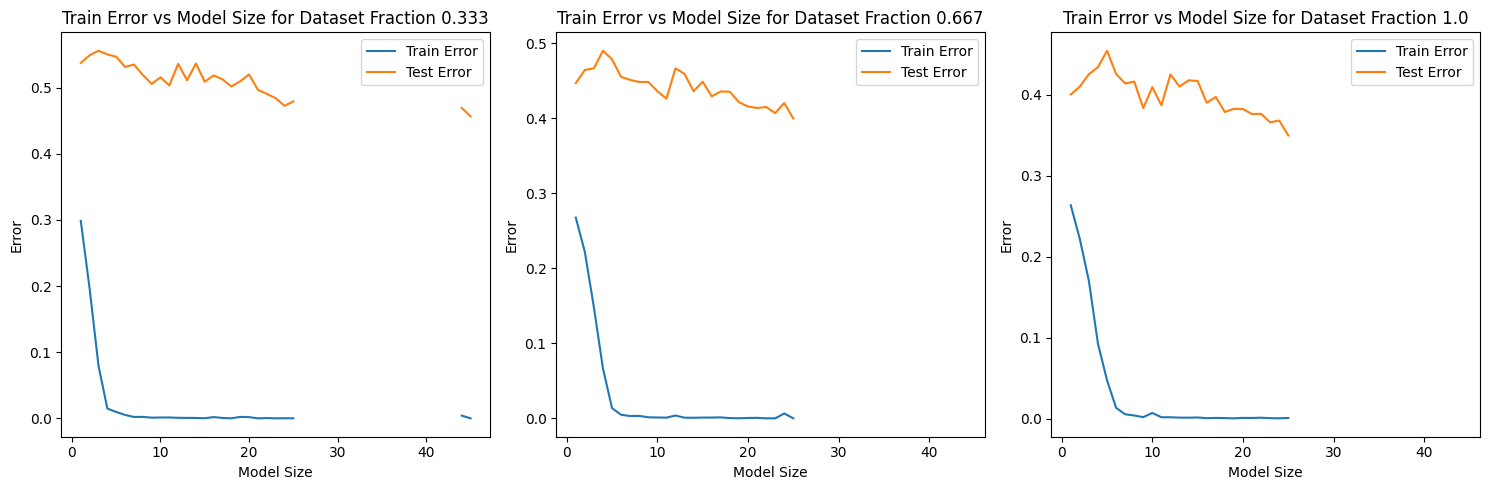

In [72]:
# plot individual plots for each dataset fraction with model size on x-axis and train error and test error on y-axis
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, dataset_fraction in enumerate(dataset_fractions):
    df_mean_temp = df_mean[df_mean['Dataset Fraction'] == dataset_fraction]
    axes[i].plot(df_mean_temp['Model Size'], df_mean_temp['Train Error'], label='Train Error')
    axes[i].plot(df_mean_temp['Model Size'], df_mean_temp['Test Error'], label='Test Error')
    axes[i].set_title(f'Train Error vs Model Size for Dataset Fraction {round(dataset_fraction, 3)}')
    axes[i].set_xlabel('Model Size')
    axes[i].set_ylabel('Error')
    axes[i].legend()
    
plt.tight_layout()
plt.show()

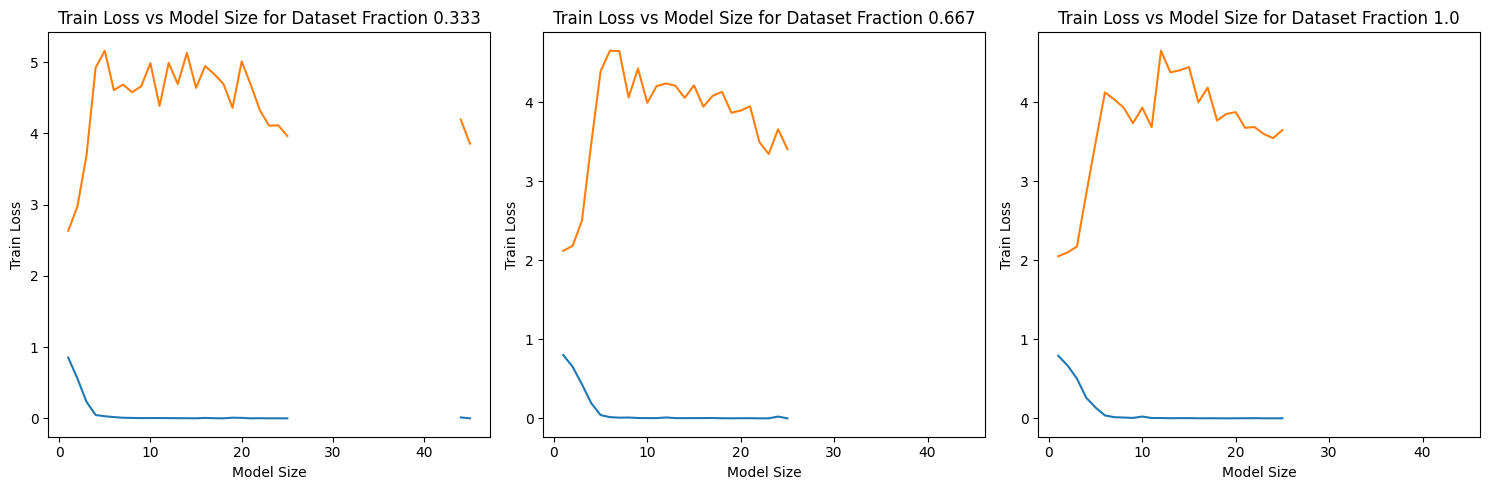

In [76]:
# plot individual plots for each dataset fraction with model size on x-axis and train loss on y-axis
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, dataset_fraction1 in enumerate(dataset_fractions1):
    df_temp1 = df_mean[df_mean['Dataset Fraction'] == dataset_fraction1]
    axes[i].plot(df_temp1['Model Size'], df_temp1['Train Loss'])
    axes[i].plot(df_temp1['Model Size'], df_temp1['Test Loss'])
    axes[i].set_title(f'Train Loss vs Model Size for Dataset Fraction {round(dataset_fraction1,3)}')
    axes[i].set_xlabel('Model Size')
    axes[i].set_ylabel('Train Loss')
    
plt.tight_layout()
plt.show()